In [1]:
import sys, os
import numpy as np

sys.path += ['./datavyz', './neural_network_dynamics', './code']
from datavyz import graph_env_manuscript as ge

### A demo fig for the effect of CB1-signalling on L23 PN

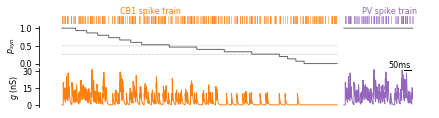

In [4]:
# Poisson process
np.random.seed(10)
CB1_rate = 150. # Hz
gCB10 = 10
tstop, tstop_PV, tshift, dt = 2000e-3, 500e-3, 50e-3, 1e-4
t = np.arange(int(tstop/dt))*dt
t_PV = np.arange(int(tstop_PV/dt))*dt
pre_events = np.cumsum(np.random.exponential(1./CB1_rate, int(1.5*tstop*CB1_rate)))
pre_events = pre_events[pre_events<tstop]
pre_events_PV = np.cumsum(np.random.exponential(1./CB1_rate, int(1.5*tstop_PV*CB1_rate)))
pre_events_PV = pre_events[pre_events<tstop_PV]

# synaptic integration
release_prob0, Tau = 1., 5e-3
shifts=np.cumsum(np.concatenate([[0], [0.1], np.ones(6)*80e-3, np.ones(5)*200e-3, np.ones(3)*60e-3]))
# shifts=np.linspace(0, tstop, 11)
Nlevels = 4
release_prob, signalling, current = 0*t+1, 0*t, 0*t
current_PV = 0*t_PV

for i, s in enumerate(shifts):
    release_prob[t>=s] = release_prob0*(1-i/(len(shifts)-1))

fig, [ax1,ax3,ax2] = ge.figure(axes_extents=[[[1,2]],
                                        [[1,8]],
                                        [[1,8]]],
                    figsize=(2.5,.07), left=3)

for e in pre_events:
    ax1.plot([e,e], [0,1], color=ge.orange, lw=0.5)
    it = int(e/dt)
    if np.random.uniform(0,1)<release_prob[it]:
        current[it:it+int(1/dt)] += gCB10*np.exp(-(t[it:it+int(1/dt)]-t[it])/Tau) 

for e in pre_events_PV:
    ax1.plot([t[-1]+tshift+e,t[-1]+tshift+e], [0,1], color=ge.purple, lw=0.5)
    it = int(e/dt)
    current_PV[it:it+int(1/dt)] += gCB10*np.exp(-(t_PV[it:it+int(1/dt)]-t_PV[it])/Tau) 

ax2.plot(t, current, color=ge.orange, lw=1)
ax2.plot(t[-1]+tshift+t_PV, current_PV, color=ge.purple, lw=1)
ax3.plot(t[-1]+tshift+t_PV, 1+0*t_PV, color=ge.dimgrey, lw=1)
ax3.plot(t, release_prob, lw=1, color=ge.dimgrey)
ax3.plot(t, 0*t+0.5, ':', lw=0.5, color=ge.dimgrey, label='V1')
ax3.plot(t, 0*t+0.25, ':', lw=0.5, color=ge.dimgrey, label='V2M')

ge.draw_bar_scales(ax2, Xbar=0.05, Xbar_label='50ms', Ybar=1e-12, loc='top-right')
ge.set_plot(ax1, [])
ge.set_plot(ax2, ['left'], ylabel='$g$ (nS)')
ge.set_plot(ax3, ['left'], ylabel='$p_{syn}$', yticks=[0,0.5,1])
ge.annotate(ax1, 'PV spike train      ', (1, 1), ha='right', color=ge.purple)
ge.annotate(ax1, 'CB1 spike train', (0.2, 1), ha='left', color=ge.orange)
fig.savefig('../doc/release-prob.svg')